In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv("insurance.csv")

In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
data["sex"].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [39]:
data["sex"] = data["sex"].map({"male": 1, "female": 0})

In [40]:
data["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [41]:
data.select_dtypes(object).columns

Index(['smoker', 'region'], dtype='object')

In [42]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [43]:
data["smoker"] = data["smoker"].map({"yes": 1, "no": 0})

In [44]:
data["smoker"].value_counts(normalize=True)*100

0    79.521674
1    20.478326
Name: smoker, dtype: float64

Text(0, 0.5, 'Number of People')

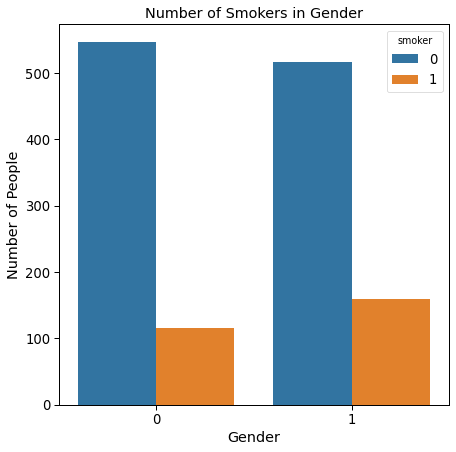

In [45]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="sex",  data=data, hue="smoker")
plt.title("Number of Smokers in Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")

<AxesSubplot:xlabel='children', ylabel='count'>

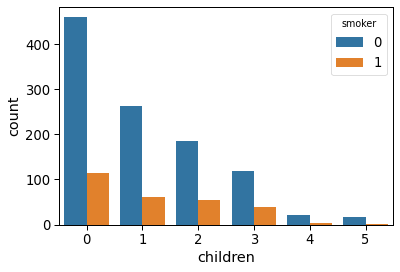

In [46]:
sns.countplot(x="children",  data=data, hue="smoker")

<AxesSubplot:>

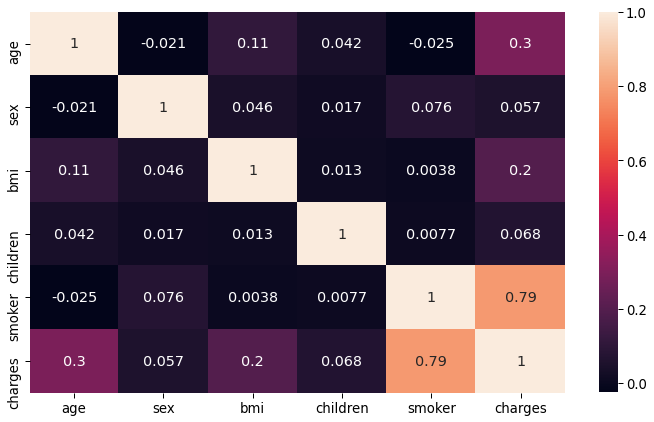

In [47]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)

In [48]:
gender_gb = data.groupby("sex")["smoker"].value_counts(normalize=True)*100
gender_gb 

sex  smoker
0    0         82.628399
     1         17.371601
1    0         76.479290
     1         23.520710
Name: smoker, dtype: float64

In [49]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## convert categorical data to one hot encoder using get_dummy

In [50]:
region_dummy = pd.get_dummies(data["region"], prefix="region_", drop_first=True, dtype=int)
region_dummy

,region__northwest,region__southeast,region__southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [51]:
data = pd.concat([data, region_dummy], axis=1)
data = data.drop("region", axis=1)

In [52]:
data.head()

,age,sex,bmi,children,smoker,charges,region__northwest,region__southeast,region__southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [53]:
data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   int64  
 2   bmi                1338 non-null   float64
 3   children           1338 non-null   int64  
 4   smoker             1338 non-null   int64  
 5   charges            1338 non-null   float64
 6   region__northwest  1338 non-null   int32  
 7   region__southeast  1338 non-null   int32  
 8   region__southwest  1338 non-null   int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 78.5 KB


In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [60]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
scaled_data = scaler.fit_transform(X_train, y_train)
scaled_test = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [64]:
linear_model.fit(X_train, y_train)
linear_predict = linear_model.predict(X_test)

In [65]:
from sklearn import metrics

In [66]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, linear_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, linear_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, linear_predict)))

Mean Absolute Error:  4145.450555627584
Mean Squared Error:  33780509.574791625
Root Mean Squared Error:  5812.100272258869


Text(0, 0.5, 'Prediction')

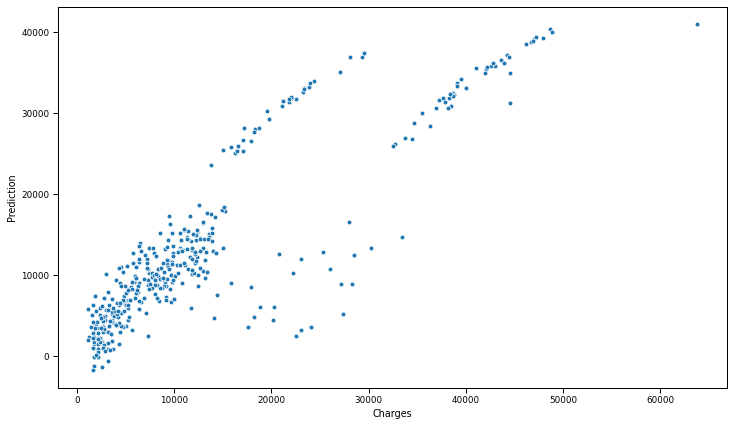

In [67]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1)
sns.scatterplot(x=y_test, y=linear_predict)
plt.xlabel("Charges")
plt.ylabel("Prediction")